In [0]:
!pip install -U -q PyDrive

In [2]:
!pip install catboost

     |████████████████████████████████| 64.8MB 45kB/s 


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
file_id = '1CJoDAPL7S5Ym-jUinpGMAKtJFuyNx_An' # URL id. 
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('test_processed.csv')
df_submit = pd.read_csv('test_processed.csv')

In [0]:
file_id = '1sMzBtIKoOUQy2xWALjM3JmKYULvBwl2M' # URL id. 
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('train_processed.csv')
df_train = pd.read_csv('train_processed.csv')

In [7]:
!ls

adc.json  sample_data  test_processed.csv  train_processed.csv


In [0]:
df_tmp = df_train.drop(['Unnamed: 0','id','center_id', 'meal_id',
       'city_code', 'region_code', 'city_region', 'city_code_encoded', 'region_code_encoded',
       'center_type', 'category', 'cuisine','num_orders_log1p'], axis=1)

In [37]:
df_tmp.columns

Index(['week', 'checkout_price', 'base_price', 'emailer_for_promotion',
       'homepage_featured', 'num_orders', 'op_area', 'discount',
       'rate_of_discount', 'week_sin', 'week_cos', 'center_id_encoded',
       'meal_id_encoded', 'city_region_encoded', 'center_type_encoded',
       'category_encoded', 'cuisine_encoded', 'Quarter', 'Year'],
      dtype='object')

In [0]:
cat_cols_catboost = ['emailer_for_promotion',
                     'homepage_featured',
                     'city_region_encoded',
                     'center_type_encoded',
                     'category_encoded',
                     'cuisine_encoded',
                    'Quarter',
                    'Year'
                    ]
cat_cols_catboost_ = ['meal_id_encoded',
                     'center_id_encoded',
                     'emailer_for_promotion',
                     'homepage_featured',
                     'city_region_encoded',
                     'center_type_encoded',
                     'category_encoded',
                     'cuisine_encoded',
                    'Quarter',
                    'Year'
                    ]                    

In [0]:
y = df_tmp['num_orders']
X = df_tmp.drop('num_orders', axis=1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.02, 
                                                    shuffle=False)

In [0]:
model = CatBoostRegressor(cat_features = cat_cols_catboost, eval_metric='MSLE', 
                          ignored_features = ['week','week_cos','center_id_encoded','meal_id_encoded','checkout_price','discount'], 
                          early_stopping_rounds=500)

In [42]:
model.fit(X, y, cat_features = cat_cols_catboost)

Learning rate set to 0.116088
0:	learn: 1.7543513	total: 510ms	remaining: 8m 29s
1:	learn: 1.6192789	total: 944ms	remaining: 7m 51s
2:	learn: 1.5087059	total: 1.39s	remaining: 7m 40s
3:	learn: 1.4122261	total: 1.65s	remaining: 6m 50s
4:	learn: 1.3259165	total: 1.99s	remaining: 6m 35s
5:	learn: 1.2402660	total: 2.35s	remaining: 6m 28s
6:	learn: 1.1681537	total: 2.69s	remaining: 6m 21s
7:	learn: 1.1010824	total: 3.07s	remaining: 6m 20s
8:	learn: 1.0422997	total: 3.43s	remaining: 6m 17s
9:	learn: 0.9913033	total: 3.75s	remaining: 6m 11s
10:	learn: 0.9435316	total: 4.06s	remaining: 6m 5s
11:	learn: 0.8938792	total: 4.35s	remaining: 5m 58s
12:	learn: 0.8558592	total: 4.66s	remaining: 5m 54s
13:	learn: 0.8174814	total: 5.01s	remaining: 5m 53s
14:	learn: 0.7936259	total: 5.39s	remaining: 5m 53s
15:	learn: 0.7597451	total: 5.75s	remaining: 5m 53s
16:	learn: 0.7325481	total: 6.15s	remaining: 5m 55s
17:	learn: 0.7074807	total: 6.5s	remaining: 5m 54s
18:	learn: 0.6892402	total: 6.91s	remaining: 5

In [0]:
#grid = GridSearchCV(estimator=model, param_grid = params, cv = 3, n_jobs=-1, verbose = 10)
#grid.fit(X_train, y_train)

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")
print("\n The best estimator across ALL searched params:\n",
      grid.best_estimator_)
print("\n The best score across ALL searched params:\n",
      grid.best_score_)
print("\n The best parameters across ALL searched params:\n",
      grid.best_params_)
print("\n ========================================================")

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  6.4min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 25.0min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 37.6min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 52.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 75.9min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 98.8min


In [0]:
y_predict = model.predict(X_test)

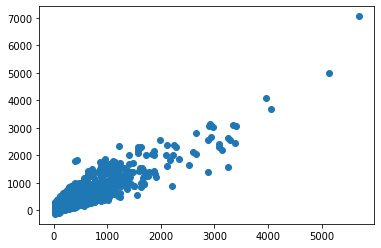

In [44]:
plt.scatter(y_test, y_predict)

In [45]:
y_pred_s = pd.Series(y_predict)
count, division = np.histogram(y_pred_s)
print(f"Data_Slice: {division}")
print(f"Count: {count}")
y_pred_s.describe()

Data_Slice: [-125.55062167  593.33365707 1312.21793581 2031.10221455 2749.98649329
 3468.87077203 4187.75505077 4906.63932951 5625.52360825 6344.40788699
 7063.29216573]
Count: [8734  301   65   21    6    2    0    1    0    1]


count    9131.000000
mean      204.500964
std       264.578439
min      -125.550622
25%        55.367289
50%       132.504661
75%       284.735135
max      7063.292166
dtype: float64

In [46]:
y_pred_less_than_0 = y_pred_s[y_pred_s < 0]
print(y_pred_less_than_0.values)

[  -2.63818413   -7.18039525  -20.56885628  -18.76388791  -89.1259945
   -1.73172437   -4.99176801  -16.10736371   -7.55546126   -5.07118291
   -6.78968611   -5.46683994   -0.96531532   -3.6809672    -5.2578009
   -7.63630912   -9.32490879   -9.02257645  -13.07758889  -10.7061998
  -15.84505976  -54.45561904   -1.19485401 -125.55062167  -40.06205782
  -13.29280895   -6.0889302   -19.20301167  -71.61169522  -95.7932779
  -25.87841989  -35.22023786   -8.75202872  -12.14948985   -8.99551694
   -5.35097165   -2.29752526]


In [0]:
# negative requirement doesn't mean anything.
y_predict[y_predict < 0] = 0

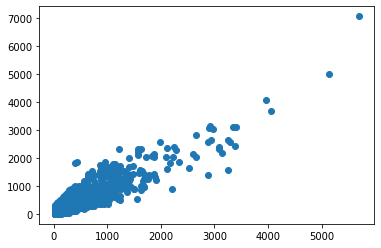

In [48]:
plt.scatter(y_test, y_predict)

In [49]:
from sklearn.metrics import mean_squared_log_error
np.sqrt(mean_squared_log_error( y_test, y_predict ))

0.644972054373152

In [0]:
df_tmp = df_submit.drop(['Unnamed: 0','id','center_id', 'meal_id',
       'city_code', 'region_code', 'city_region', 'city_code_encoded', 'region_code_encoded',
       'center_type', 'category', 'cuisine'], axis=1)

In [51]:
df_tmp.columns

Index(['week', 'checkout_price', 'base_price', 'emailer_for_promotion',
       'homepage_featured', 'op_area', 'discount', 'rate_of_discount',
       'week_sin', 'week_cos', 'center_id_encoded', 'meal_id_encoded',
       'city_region_encoded', 'center_type_encoded', 'category_encoded',
       'cuisine_encoded', 'Quarter', 'Year'],
      dtype='object')

In [0]:
y_predict = model.predict(df_tmp)

In [0]:
# negative requirement doesn't mean anything.
y_predict[y_predict < 0] = 0

In [0]:
submission_df = df_submit.copy()
submission_df['num_orders'] = y_predict
submission_df = submission_df[['id', 'num_orders']]
submission_df.to_csv('submission_1.csv', index=False)

!cp submission_1.csv "drive/My Drive/"

In [0]:
with open('/content/gdrive/My Drive/submission_1.csv', 'w') as f:
  f.write('content')

In [57]:
!cp submission_1.csv "drive/My Drive/data"

cp: cannot create regular file 'drive/My Drive/data': No such file or directory


In [0]:
from google.colab import files
files.download('submission_1.csv')